In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd 
data = pd.read_csv("C:/Users/Birti Kaur/OneDrive/Desktop/final.csv")
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669.0,9656.0,7561.0,214.0,2674.0,1338.0
1,2,3,7057.0,9810.0,9568.0,1762.0,3293.0,1776.0
2,2,3,6353.0,8808.0,7684.0,2405.0,3516.0,7844.0
3,1,3,13265.0,1196.0,4221.0,6404.0,507.0,1788.0
4,2,3,22615.0,5410.0,7198.0,NaN,1777.0,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Channel           440 non-null    int64  
 1   Region            440 non-null    int64  
 2   Fresh             439 non-null    float64
 3   Milk              438 non-null    float64
 4   Grocery           438 non-null    float64
 5   Frozen            438 non-null    float64
 6   Detergents_Paper  439 non-null    float64
 7   Delicassen        439 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 27.6 KB


In [4]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,439.000000,438.000000,438.000000,438.000000,439.000000,439.000000
mean,1.322727,2.543182,12010.369021,5802.043379,7960.041096,3074.374429,2882.633257,1516.533030
std,0.468052,0.774272,12659.991699,7392.448252,9523.408318,4864.741417,4773.234058,2817.889215
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3119.500000,1541.250000,2149.000000,738.750000,256.500000,407.500000
50%,1.000000,3.000000,8533.000000,3627.000000,4755.500000,1526.000000,813.000000,964.000000
75%,2.000000,3.000000,16934.500000,7176.000000,10675.250000,3543.500000,3935.000000,1803.500000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [5]:
data["Channel"].value_counts()

1    298
2    142
Name: Channel, dtype: int64

In [6]:
data["Region"].value_counts()

3    316
1     77
2     47
Name: Region, dtype: int64

<AxesSubplot:>

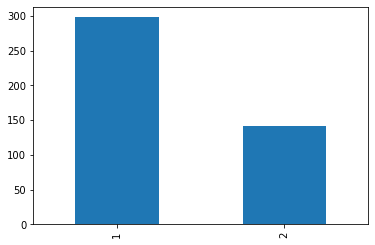

In [7]:
data['Channel'].value_counts().plot(kind='bar')

<AxesSubplot:>

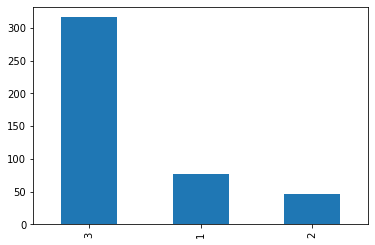

In [8]:
data['Region'].value_counts().plot(kind='bar')

<AxesSubplot:>

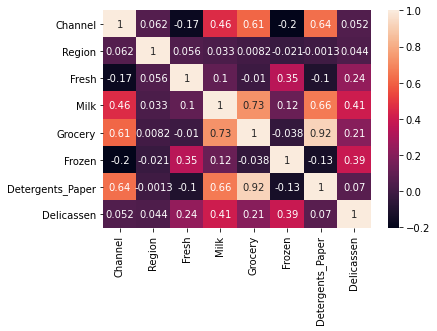

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
corrMatrix = data.corr()
sns.heatmap(corrMatrix, annot=True)

In [10]:
data.isnull().sum()

Channel             0
Region              0
Fresh               1
Milk                2
Grocery             2
Frozen              2
Detergents_Paper    1
Delicassen          1
dtype: int64

In [11]:
## Data Preparation

In [12]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
data_num = data

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),   
    ('std_scaler', StandardScaler()),
])

In [14]:
from sklearn.compose import ColumnTransformer
num_attribs=list(data_num)
full_pipeline=ColumnTransformer([
   ("num", num_pipeline, num_attribs) 
])
data_prepared = full_pipeline.fit_transform(data) 

In [15]:
## K -means

In [16]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
sil_score=[]
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 20)
 
for k in K:
    
    kmeanModel = KMeans(n_clusters=k,random_state=0,init="random")
    kmeanModel.fit(data_prepared)
    inertias.append(kmeanModel.inertia_)
    if k != 1:
        sil_score.append(silhouette_score(data_prepared, kmeanModel.labels_, 'euclidean'))
        mapping1[k] = silhouette_score(data_prepared, kmeanModel.labels_, 'euclidean')
    mapping2[k] = kmeanModel.inertia_

In [17]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

2 : 0.372858486135133
3 : 0.35646920560161743
4 : 0.348224942042936
5 : 0.3569641763242844
6 : 0.3550797075564612
7 : 0.35999782869535013
8 : 0.3210984389634259
9 : 0.31678592097894837
10 : 0.30925611735581643
11 : 0.29238636580086913
12 : 0.27345912712050874
13 : 0.2684760766103523
14 : 0.3254757202879421
15 : 0.2510720421026148
16 : 0.25720233856937497
17 : 0.23462364940066555
18 : 0.2404504430338095
19 : 0.24614247436492592


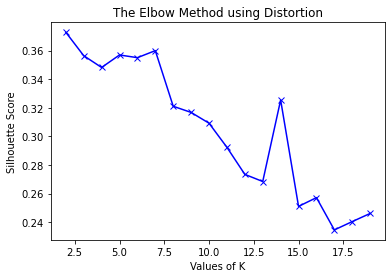

In [18]:
plt.plot(range(2,20), sil_score, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette Score')
plt.title('The Elbow Method using Distortion')
plt.show()

In [19]:
for key, val in mapping2.items():
    print(f'{key} : {val}')

1 : 3519.999999999996
2 : 2601.275971093921
3 : 2149.5926160148647
4 : 1852.180778072502
5 : 1567.7152995317786
6 : 1348.2458047790506
7 : 1236.6905970448477
8 : 1117.615050924536
9 : 1074.520521642688
10 : 1023.2143071690831
11 : 955.8378280962093
12 : 912.9730529619948
13 : 898.27861002177
14 : 740.6380511487594
15 : 713.0119565027348
16 : 688.3322087481815
17 : 643.9868675709903
18 : 631.2360561487365
19 : 615.9520801299158


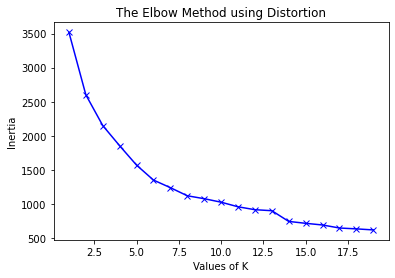

In [20]:
plt.plot(K,inertias , 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Distortion')
plt.show()

In [21]:
kmeanModel = KMeans(n_clusters=11,random_state=0,init="random")
kmeanModel.fit(data_prepared)

KMeans(init='random', n_clusters=11, random_state=0)

In [22]:
from collections import Counter
clusters= Counter(kmeanModel.labels_)
print(clusters)

Counter({3: 138, 6: 73, 2: 58, 0: 48, 7: 42, 10: 23, 9: 23, 5: 17, 4: 11, 1: 5, 8: 2})


In [23]:
for (key, value) in sorted(clusters.items()):
     print("Cluster ",key+1 , " : " , value)

Cluster  1  :  48
Cluster  2  :  5
Cluster  3  :  58
Cluster  4  :  138
Cluster  5  :  11
Cluster  6  :  17
Cluster  7  :  73
Cluster  8  :  42
Cluster  9  :  2
Cluster  10  :  23
Cluster  11  :  23


In [24]:
## K- Means ++  

In [25]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
sil_score=[]
inertias  = []
mapping1 = {}
mapping2 = {}
K = range(1, 20)
 
for k in K:
    
    kmeanModel = KMeans(n_clusters=k,random_state=0,init="k-means++")
    kmeanModel.fit(data_prepared)
    inertias.append(kmeanModel.inertia_)
    if k != 1:
        sil_score.append(silhouette_score(data_prepared, kmeanModel.labels_, 'euclidean'))
        mapping1[k] = silhouette_score(data_prepared, kmeanModel.labels_, 'euclidean')
    mapping2[k] = kmeanModel.inertia_

In [26]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

2 : 0.37294783102360424
3 : 0.35646920560161743
4 : 0.3478487129942104
5 : 0.3509509740378837
6 : 0.3514918510550459
7 : 0.35435805837501505
8 : 0.3630815271039351
9 : 0.3581980662924202
10 : 0.3631784078869665
11 : 0.3678309783248305
12 : 0.36521818770012315
13 : 0.327265792624772
14 : 0.33567783391530376
15 : 0.32355739451954846
16 : 0.3261916731121457
17 : 0.27559383221560535
18 : 0.27657916292912343
19 : 0.2788810167162903


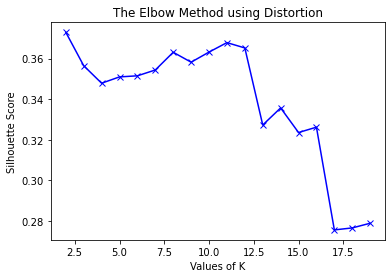

In [27]:
plt.plot(range(2,20), sil_score, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette Score')
plt.title('The Elbow Method using Distortion')
plt.show()

In [28]:
for key, val in mapping2.items():
    print(f'{key} : {val}')

1 : 3519.999999999996
2 : 2601.3384930024195
3 : 2149.5926160148647
4 : 1852.107500467637
5 : 1561.2409308300712
6 : 1313.7214818717446
7 : 1188.8817738760838
8 : 1058.2015533722927
9 : 971.6382572200362
10 : 922.7730614920602
11 : 857.4987493003091
12 : 803.0995597191603
13 : 769.3977182838627
14 : 714.4568392871478
15 : 676.4784713624936
16 : 651.7903422056892
17 : 625.5214945215599
18 : 592.631030771812
19 : 572.6296540849133


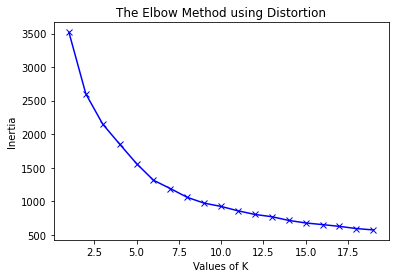

In [29]:
plt.plot(K,inertias , 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Distortion')
plt.show()

In [30]:
kmeanModel = KMeans(n_clusters=11,random_state=0,init="k-means++")
kmeanModel.fit(data_prepared)

KMeans(n_clusters=11, random_state=0)

In [31]:
from collections import Counter
clusters= Counter(kmeanModel.labels_)
print(clusters)

Counter({9: 155, 0: 92, 6: 80, 5: 35, 1: 34, 4: 32, 2: 6, 10: 3, 8: 1, 3: 1, 7: 1})


In [32]:
for (key, value) in sorted(clusters.items()):
     print("Cluster ",key+1 , " : " , value)

Cluster  1  :  92
Cluster  2  :  34
Cluster  3  :  6
Cluster  4  :  1
Cluster  5  :  32
Cluster  6  :  35
Cluster  7  :  80
Cluster  8  :  1
Cluster  9  :  1
Cluster  10  :  155
Cluster  11  :  3


Reference: https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/